# Data: Ad Sales Data
# Use Case: Revenue Prediction
# Model: Regression Models

Code link: https://www.kaggle.com/code/akshaysunil07/ad-tech-revenue-regression/notebook 

# Installing packages section

In [ ]:
# Installing packages set for without init script
# !pip install --upgrade pip

# !pip install "snowflake-connector-python[pandas]" "snowflake-snowpark-python[pandas]" snowflake-snowpark-python==1.9.0 fosforio==1.0.1 fosforml==1. numpy pandas matplotlib scikit-learn xgboost python-dateutil 
# #!pip install tqdm 
# !pip install --upgrade --q snowflake-snowpark-python==1.9.0
# !pip uninstall urllib3 -y
# !pip install urllib3==1.26.15
!pip install seaborn

In [ ]:
pip freeze

# Restart and clear outputs

# Importing packages

In [1]:
from fosforio import snowflake
from fosforml import *
from fosforml.constants import MLModelFlavours
from fosforio import get_dataframe

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 500)
import seaborn as sns

import warnings; warnings.simplefilter('ignore')
from joblib import dump, load
import requests
#from tqdm import tqdm
import time
import calendar
import configparser
from dateutil.relativedelta import relativedelta
import datetime

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from time import sleep
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from dateutil.easter import easter
from scipy.optimize import minimize_scalar
from scipy.optimize import curve_fit
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

Connection manager service url initialised to http://fdc-project-manager:80/project-manager
If you need to update its value then update the variable CONNECTION_MANAGER_BASE_URL in os env.


/opt/conda/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


# Importing data from snowflake

In [5]:
#from fosforio import snowflake
#from fosforio import get_dataframe
# snowflake.get_connection(connection_name="ME_AD_SALES_CXN")
#df = get_dataframe("AD_SALES_IMP")
# df_all = get_dataframe("AD_TECH_INPUT")
df_all = pd.read_csv("./ad_tech_input.csv")

In [6]:
df_copy = df_all.copy()

In [7]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AD_DATE                  567291 non-null  object 
 1   SITE_ID                  567291 non-null  int64  
 2   AD_TYPE_ID               567291 non-null  int64  
 3   GEO_ID                   567291 non-null  int64  
 4   DEVICE_CATEGORY_ID       567291 non-null  int64  
 5   ADVERTISER_ID            567291 non-null  int64  
 6   ORDER_ID                 567291 non-null  int64  
 7   LINE_ITEM_TYPE_ID        567291 non-null  int64  
 8   OS_ID                    567291 non-null  int64  
 9   MONETIZATION_CHANNEL_ID  567291 non-null  int64  
 10  AD_UNIT_ID               567291 non-null  int64  
 11  TOTAL_IMPRESSIONS        567291 non-null  int64  
 12  TOTAL_REVENUE            567291 non-null  float64
 13  VIEWABLE_IMPRESSIONS     567291 non-null  int64  
 14  MEAS

In [8]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AD_DATE                  567291 non-null  object 
 1   SITE_ID                  567291 non-null  int64  
 2   AD_TYPE_ID               567291 non-null  int64  
 3   GEO_ID                   567291 non-null  int64  
 4   DEVICE_CATEGORY_ID       567291 non-null  int64  
 5   ADVERTISER_ID            567291 non-null  int64  
 6   ORDER_ID                 567291 non-null  int64  
 7   LINE_ITEM_TYPE_ID        567291 non-null  int64  
 8   OS_ID                    567291 non-null  int64  
 9   MONETIZATION_CHANNEL_ID  567291 non-null  int64  
 10  AD_UNIT_ID               567291 non-null  int64  
 11  TOTAL_IMPRESSIONS        567291 non-null  int64  
 12  TOTAL_REVENUE            567291 non-null  float64
 13  VIEWABLE_IMPRESSIONS     567291 non-null  int64  
 14  MEAS

In [9]:
# df.columns = df.columns.str.lower()
df_all.columns = df_all.columns.str.lower()
#df.info()

In [10]:
df_all.columns

Index(['ad_date', 'site_id', 'ad_type_id', 'geo_id', 'device_category_id',
       'advertiser_id', 'order_id', 'line_item_type_id', 'os_id',
       'monetization_channel_id', 'ad_unit_id', 'total_impressions',
       'total_revenue', 'viewable_impressions', 'measurable_impressions',
       'revenue_share_percent', 'ad_type', 'ad_format', 'ad_media_type',
       'device_type', 'city', 'city_code', 'population', 'city_lat',
       'city_lon', 'line_item_group', 'line_item_type', 'monetization_channel',
       'os_type'],
      dtype='object')

# Exploratory data analysis

In [11]:
cat_col=['ad_date', 'site_id','advertiser_id', 'order_id','ad_type', 'ad_format', 'ad_media_type',
         'device_type', 'city', 'line_item_group', 'line_item_type', 'monetization_channel','os_type']
scat_col = ['site_id','ad_type', 'ad_format', 'device_type', 'advertiser_id',
            'line_item_group', 'line_item_type', 'os_type','monetization_channel']
num_col=list(df_all.select_dtypes(np.number).columns)

IndexError: list index out of range

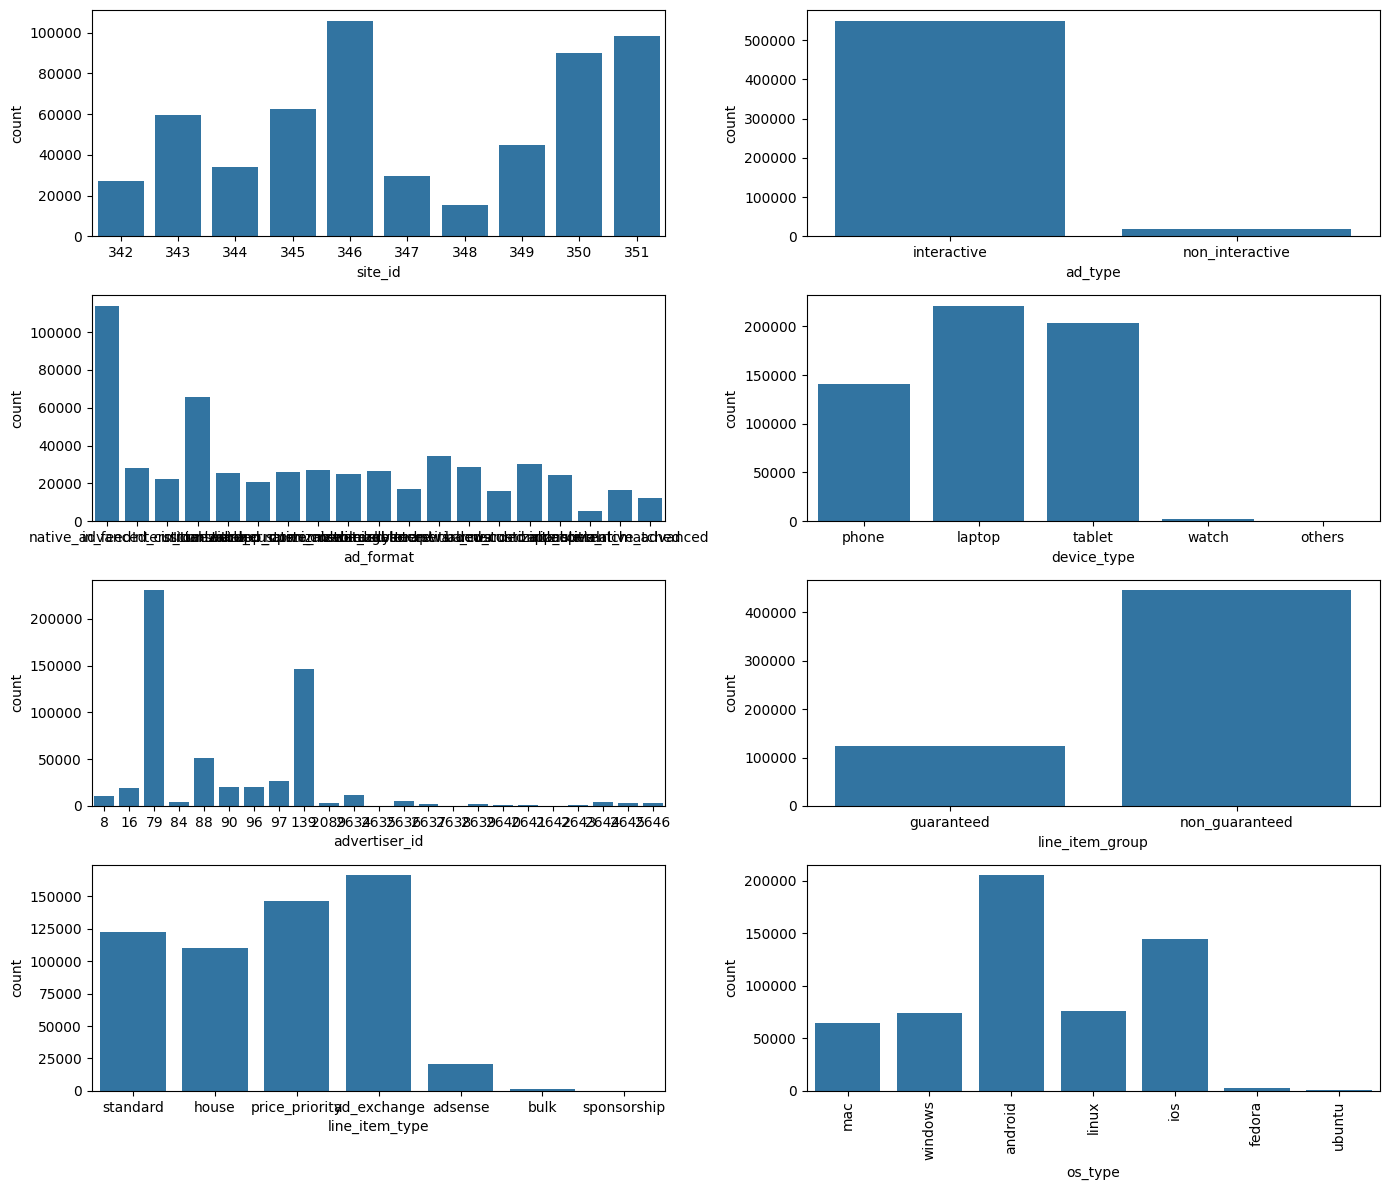

In [12]:
fig, ax = plt.subplots(4,2, figsize=(14,12))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i,col in enumerate(scat_col):
    sns.countplot(data=df_all,x=col,ax=axes_[i])
    if col=='advertiser_id':
        plt.xticks(rotation=90)
    plt.tight_layout()

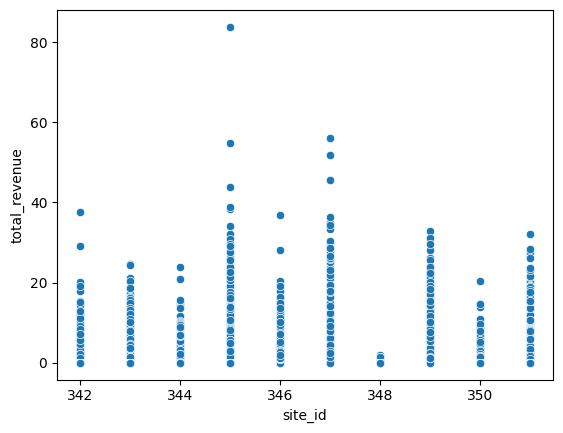

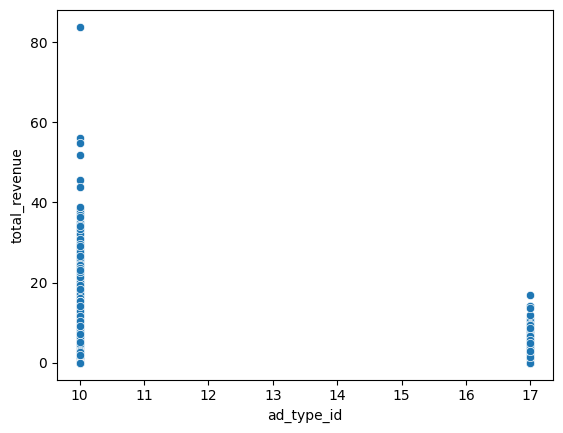

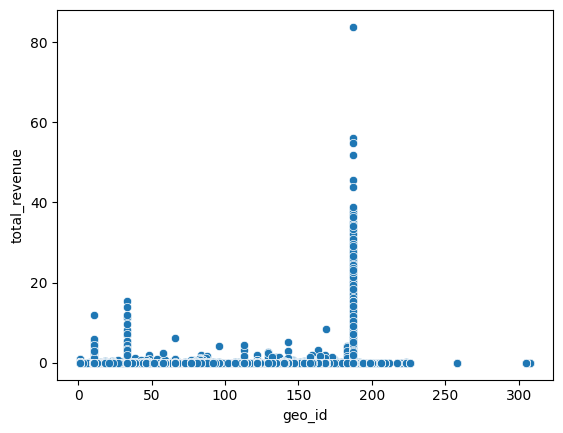

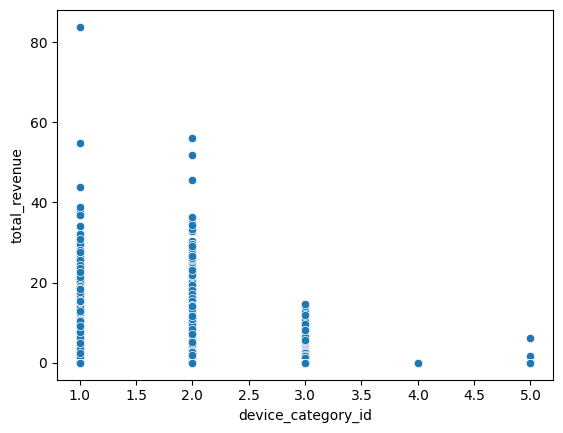

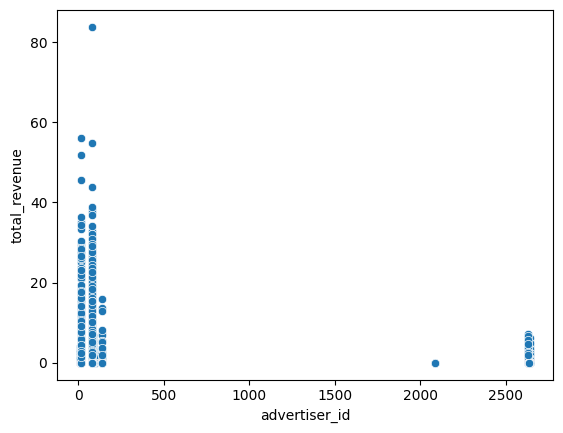

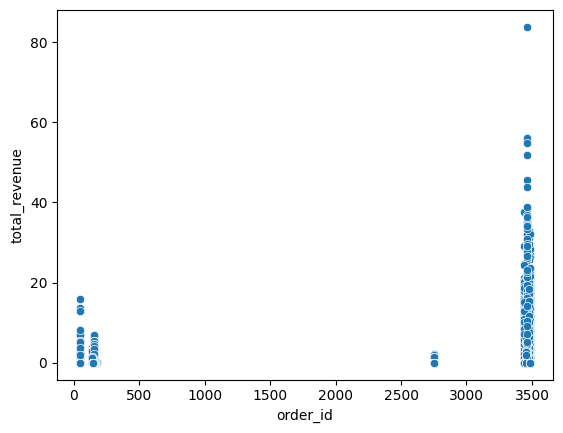

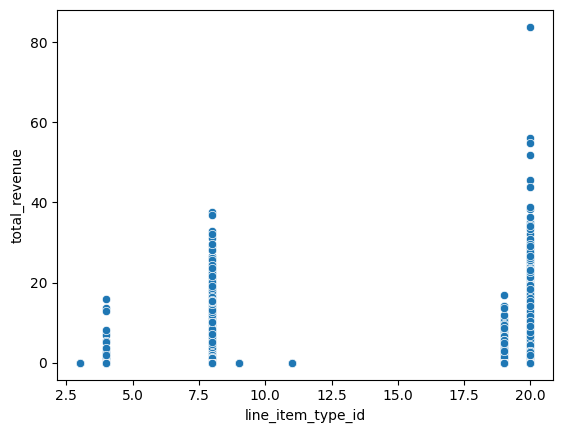

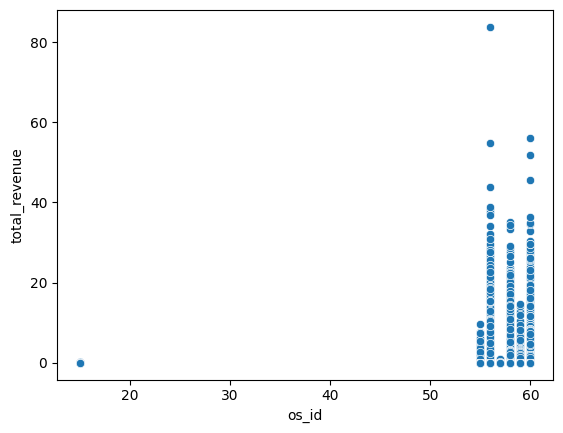

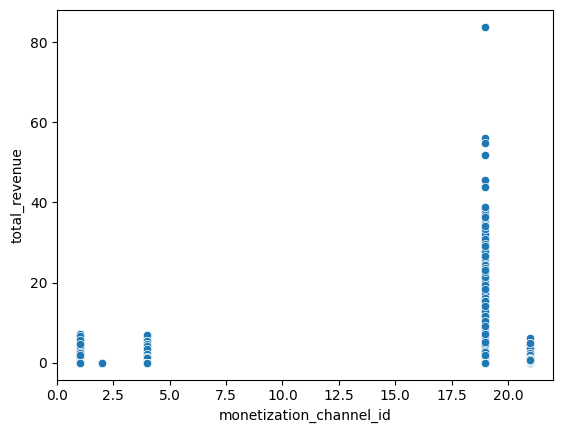

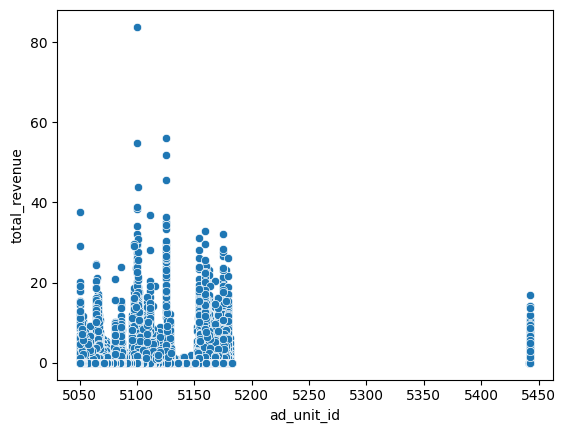

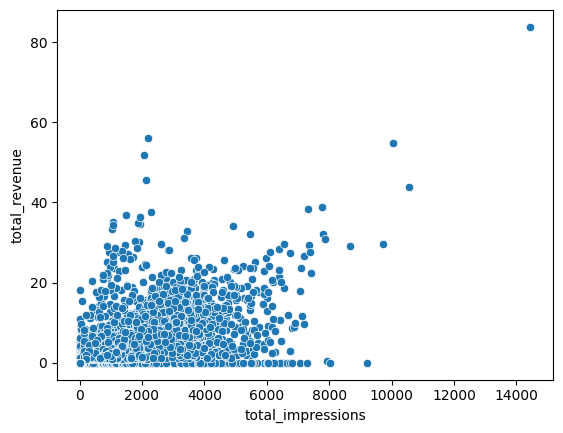

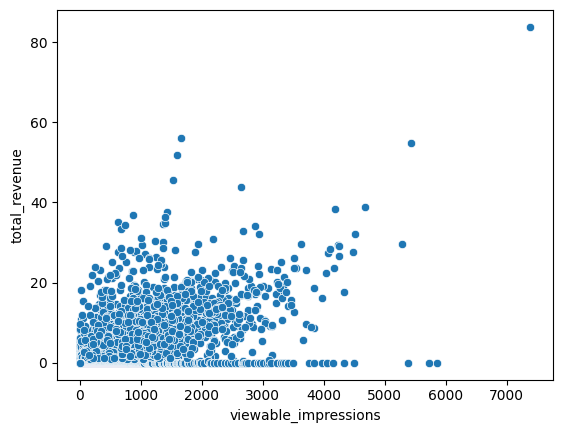

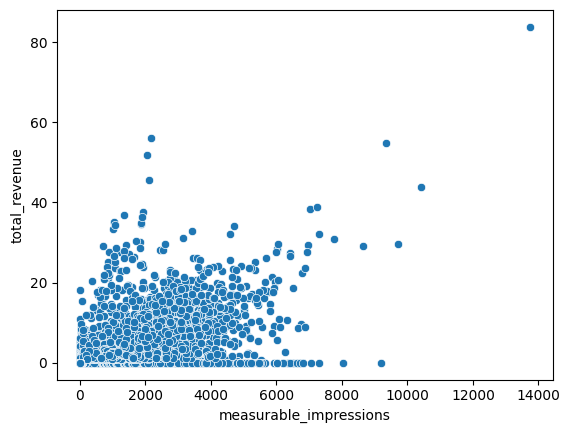

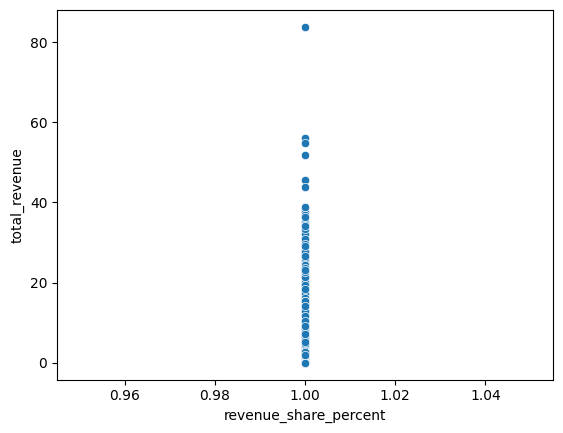

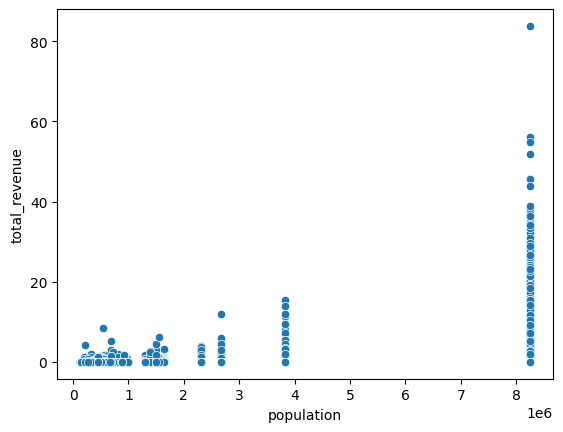

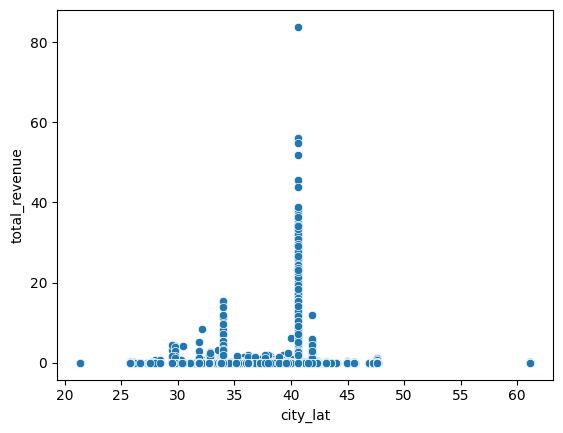

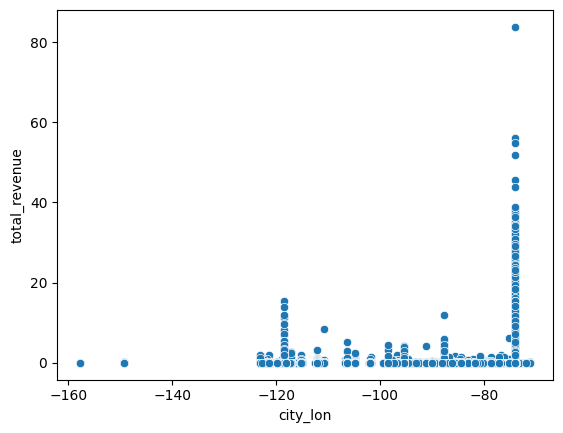

In [13]:
for i in num_col:
    if i!='total_revenue':
        sns.scatterplot(data=df_all,x=i,y='total_revenue')
        plt.show()

In [ ]:
#df.max()

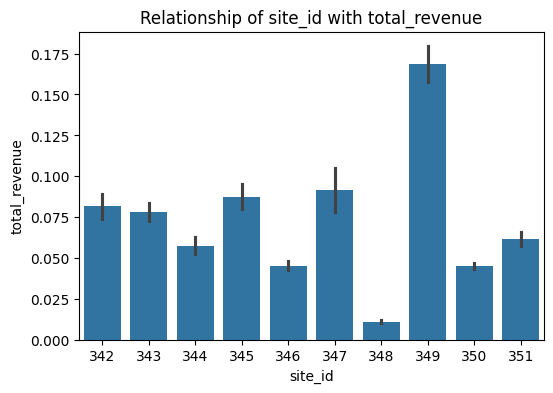

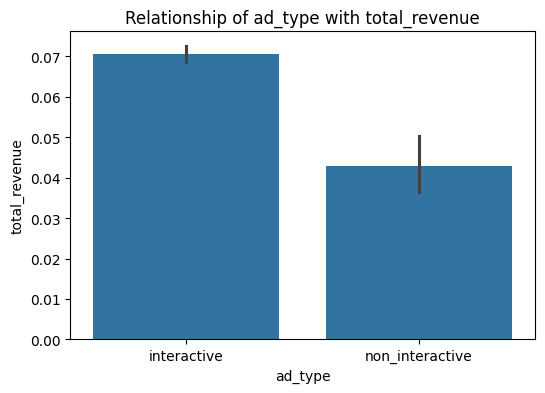

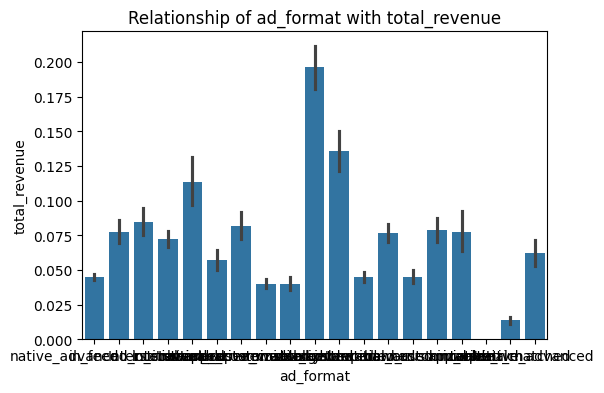

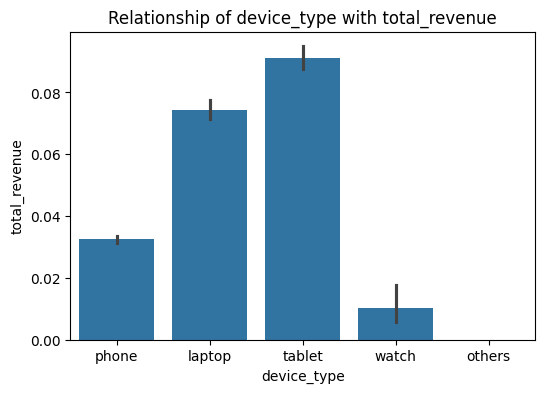

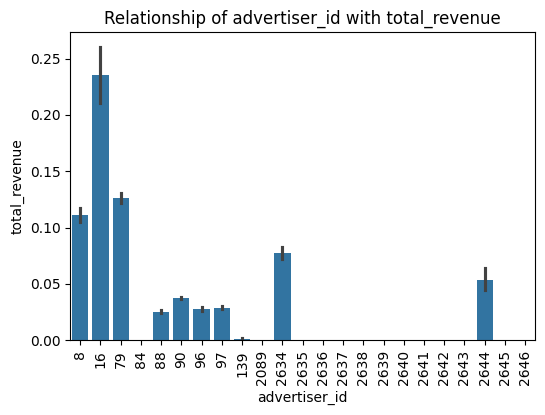

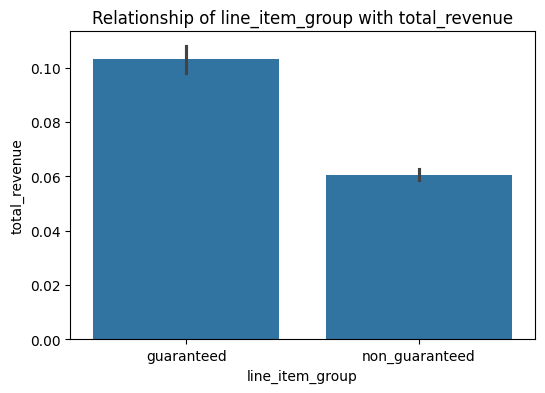

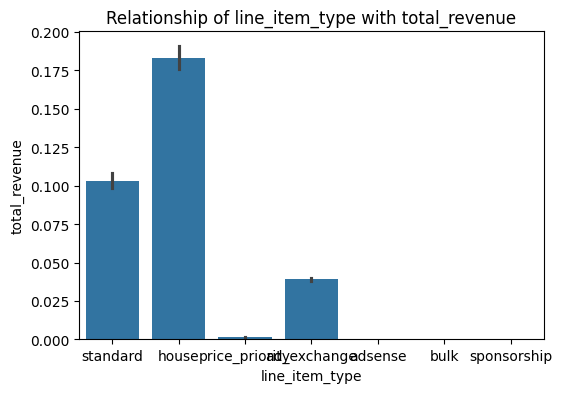

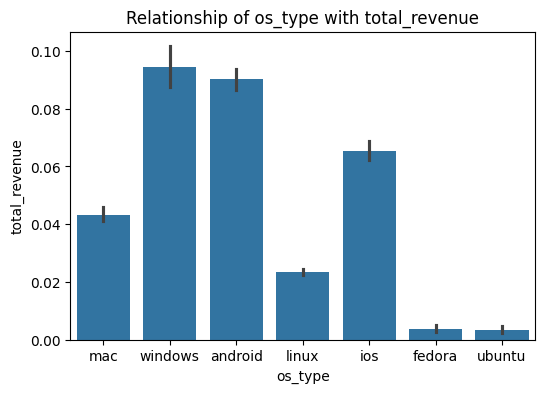

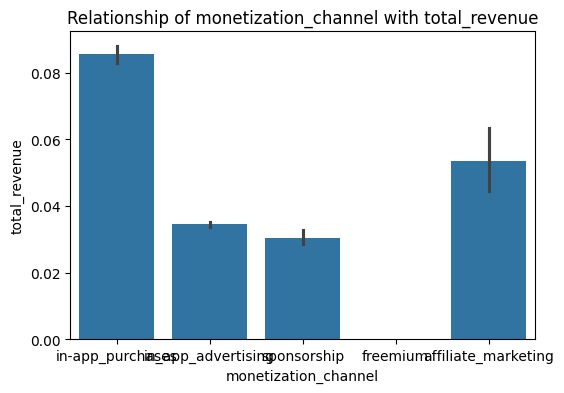

In [14]:
for col in (scat_col):
    title='Relationship of '+col+' with total_revenue'
    plt.figure(figsize=(6,4))
    sns.barplot(y=df_all['total_revenue'],x=df_all[col])
    if col=='advertiser_id':
        plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

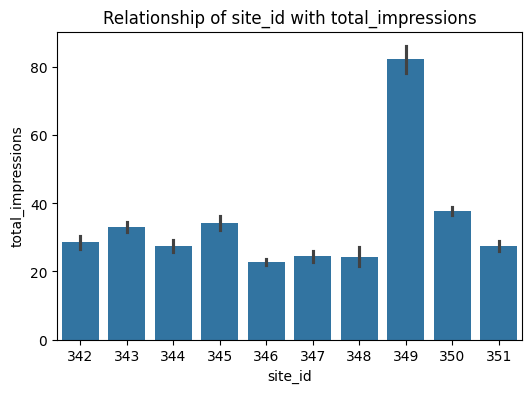

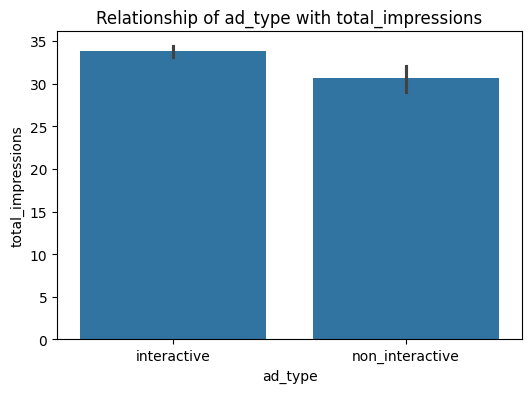

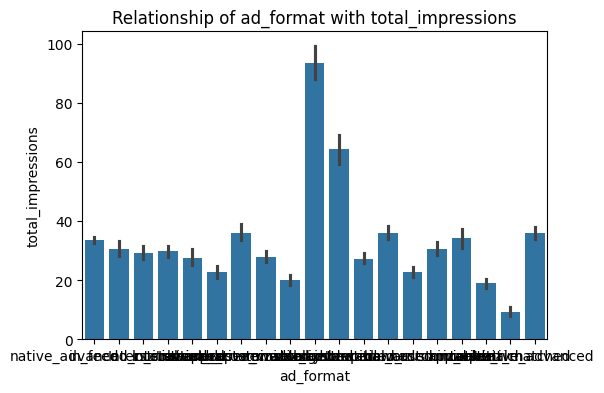

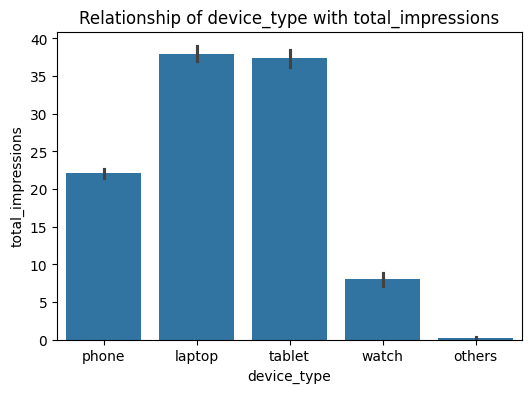

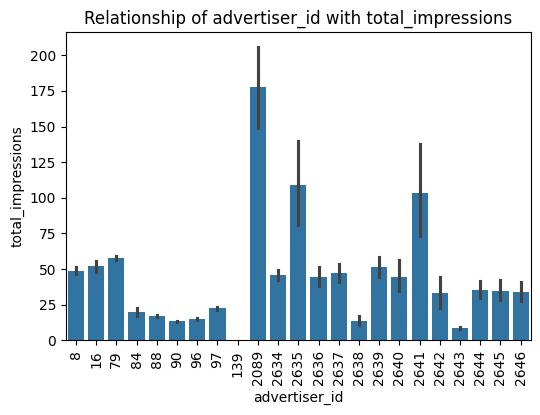

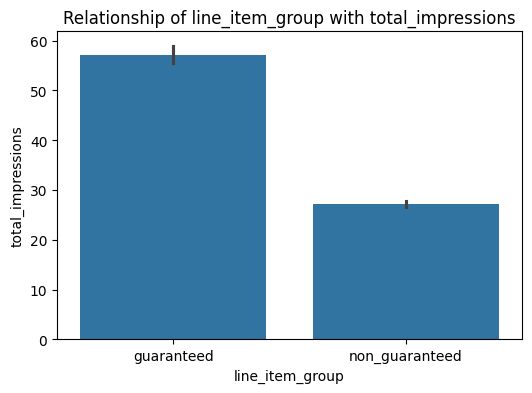

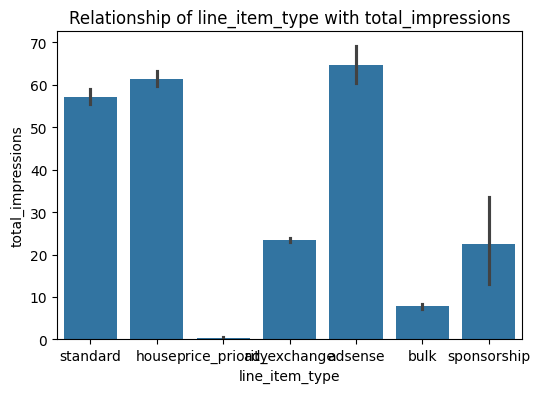

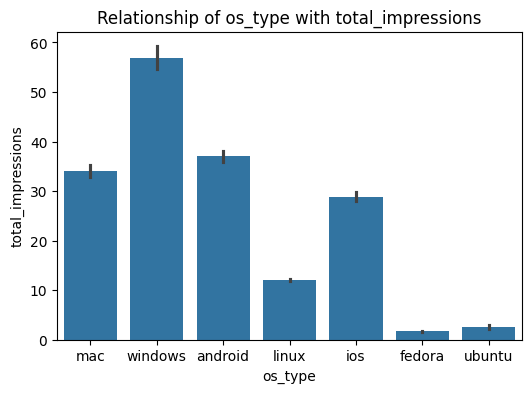

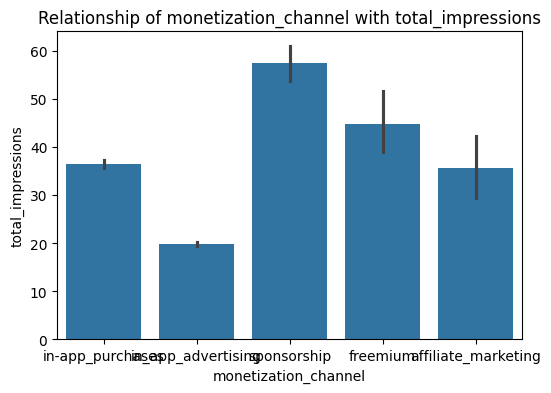

In [15]:
for col in (scat_col):
    title='Relationship of '+ col +' with total_impressions'
    plt.figure(figsize=(6,4))
    sns.barplot(y=df_all['total_impressions'],x=df_all[col],)
    if col=='advertiser_id':
        plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

In [16]:
for i in cat_col:
    df_all[i]=df_all[i].astype('object')

In [17]:
df_all.columns

Index(['ad_date', 'site_id', 'ad_type_id', 'geo_id', 'device_category_id',
       'advertiser_id', 'order_id', 'line_item_type_id', 'os_id',
       'monetization_channel_id', 'ad_unit_id', 'total_impressions',
       'total_revenue', 'viewable_impressions', 'measurable_impressions',
       'revenue_share_percent', 'ad_type', 'ad_format', 'ad_media_type',
       'device_type', 'city', 'city_code', 'population', 'city_lat',
       'city_lon', 'line_item_group', 'line_item_type', 'monetization_channel',
       'os_type'],
      dtype='object')

In [18]:
df_all.drop(['ad_unit_id','revenue_share_percent','ad_type_id','site_id','advertiser_id',
        'ad_date','geo_id','order_id', 'ad_type', 'ad_format', 'ad_media_type', 'line_item_group',
            'city', 'city_code'],axis=1,inplace=True)

In [19]:
df_all.columns

Index(['device_category_id', 'line_item_type_id', 'os_id',
       'monetization_channel_id', 'total_impressions', 'total_revenue',
       'viewable_impressions', 'measurable_impressions', 'device_type',
       'population', 'city_lat', 'city_lon', 'line_item_type',
       'monetization_channel', 'os_type'],
      dtype='object')

In [20]:
df_all.drop(['device_category_id', 'line_item_type_id', 'os_id',
       'monetization_channel_id','population', 'city_lat', 'city_lon'],axis=1,inplace=True)

In [21]:
df_all.select_dtypes(object)

,device_type,line_item_type,monetization_channel,os_type
0,phone,standard,in-app_purchases,mac
1,laptop,standard,in-app_purchases,windows
2,tablet,standard,in-app_purchases,android
3,laptop,standard,in-app_purchases,windows
4,tablet,standard,in-app_purchases,android
...,...,...,...,...
567286,tablet,standard,in-app_purchases,android
567287,laptop,standard,in-app_purchases,ios
567288,phone,standard,in-app_purchases,mac
567289,laptop,standard,in-app_purchases,windows


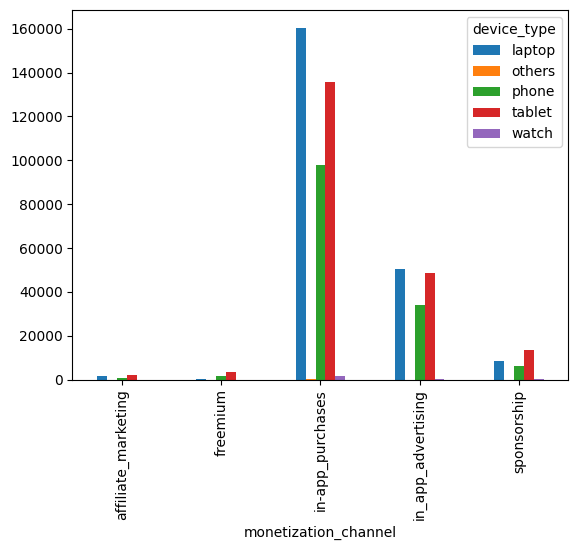

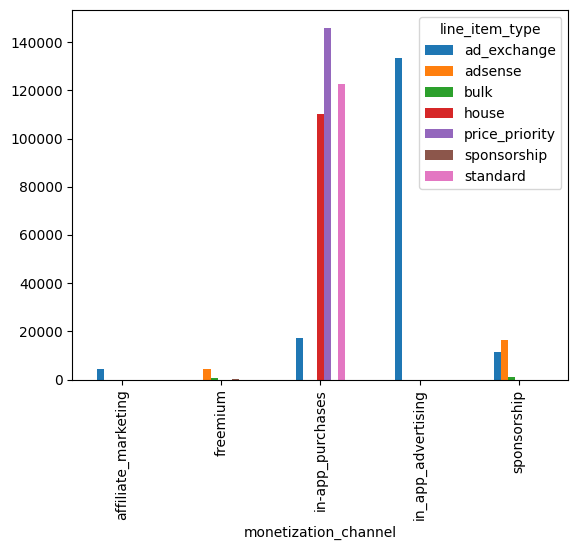

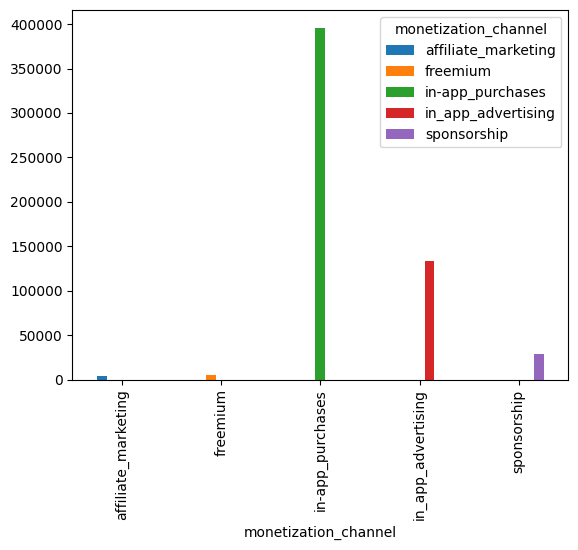

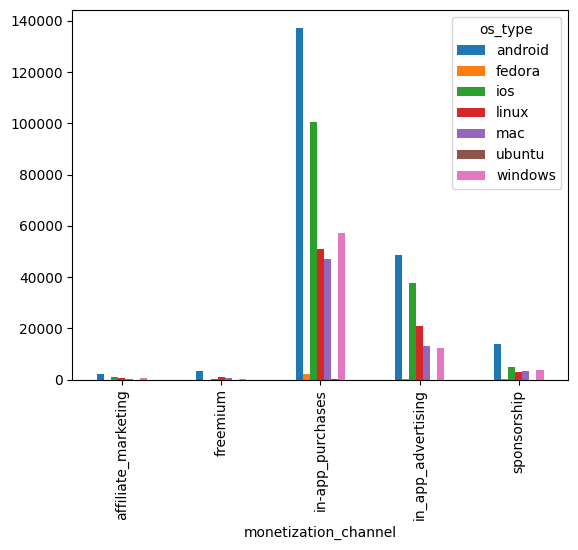

In [22]:
for i in df_all.select_dtypes(object).columns:
    pd.crosstab(df_all['monetization_channel'],df_all[i]).plot(kind='bar')
    plt.show()

# Predictive Modelling

In [ ]:
#df.info()

In [23]:
import joblib

In [24]:
Xd = df_all.drop('total_revenue',axis=1)
y = df_all['total_revenue']

In [25]:
Xd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   total_impressions       567291 non-null  int64 
 1   viewable_impressions    567291 non-null  int64 
 2   measurable_impressions  567291 non-null  int64 
 3   device_type             567291 non-null  object
 4   line_item_type          567291 non-null  object
 5   monetization_channel    567291 non-null  object
 6   os_type                 567291 non-null  object
dtypes: int64(3), object(4)
memory usage: 30.3+ MB


In [ ]:
#df_all.info()

In [ ]:
#X = pd.get_dummies(Xd,drop_first=True)

In [ ]:
#X.info()

In [ ]:
#from sklearn.preprocessing import StandardScaler
#ss = StandardScaler()

In [ ]:
#X[pc_col] = pd.DataFrame(ss.fit_transform(X[pc_col]),columns=[pc_col])

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Xd,y,test_size=0.2,random_state=4)

In [27]:
pc_col = ['total_impressions', 'viewable_impressions', 'measurable_impressions']

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=2))
        ]), pc_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['device_type', 'line_item_type', 'os_type',
       'monetization_channel'])
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

In [29]:
models = [

    {
        'name': 'RandomForestRegressor',
        'regressor': [RandomForestRegressor()],
        'regressor__n_estimators': [50],
        'regressor__max_depth': [10],
        'regressor__min_samples_split': [2],
        'regressor__min_samples_leaf': [1],
        'regressor__bootstrap': [True]
    },
]

In [30]:
#pipeline = Pipeline(steps=[
#    ('preprocessor', preprocessor),
#    ('regressor', LinearRegression())  # Placeholder
#])

best_estimators = []
for model_params in models:
    model_name = model_params.pop('name')  # Extract the model name
    grid_search = GridSearchCV(pipeline, model_params, cv=3, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimator = grid_search.best_estimator_
    best_estimators.append(best_estimator)
    print(f"Training completed for model {model_name}")
    
    # Save the best model
    joblib.dump(best_estimator, f'best_model_{model_name}.pkl')
    print(f"Best model {model_name} saved to best_model_{model_name}.pkl")

Training completed for model RandomForestRegressor
Best model RandomForestRegressor saved to best_model_RandomForestRegressor.pkl


In [31]:
best_estimator

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=2))]),
                                                  ['total_impressions',
                                                   'viewable_impressions',
                                                   'measurable_impressions']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['device_type',
                                                   'line_item_type', 'os_type',
                                                   'monetization_channel'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, n_estimators=50))])

In [32]:
results = []
for estimator in best_estimators:
    y_pred_train = estimator.predict(X_train)
    y_pred_test = estimator.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    results.append({
        'model': estimator.named_steps['regressor'].__class__.__name__,
        'best_params': estimator.named_steps['regressor'].get_params(),
        'mse': mse,
        'r2': r2
    })

results_df = pd.DataFrame(results)
results_df

,model,best_params,mse,r2
0,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.126288,0.738879


In [33]:
df_all['predicted_revenue'] = best_estimator.predict(Xd)

In [34]:
df_copy['predicted_revenue'] = best_estimator.predict(Xd)

In [35]:
df_copy

,AD_DATE,SITE_ID,AD_TYPE_ID,GEO_ID,DEVICE_CATEGORY_ID,ADVERTISER_ID,ORDER_ID,LINE_ITEM_TYPE_ID,OS_ID,MONETIZATION_CHANNEL_ID,AD_UNIT_ID,TOTAL_IMPRESSIONS,TOTAL_REVENUE,VIEWABLE_IMPRESSIONS,MEASURABLE_IMPRESSIONS,REVENUE_SHARE_PERCENT,AD_TYPE,AD_FORMAT,AD_MEDIA_TYPE,DEVICE_TYPE,CITY,CITY_CODE,POPULATION,CITY_LAT,CITY_LON,LINE_ITEM_GROUP,LINE_ITEM_TYPE,MONETIZATION_CHANNEL,OS_TYPE,predicted_revenue
0,2024-06-18,350,10,33,3,79,3485,8,59,19,5168,2,0.0,0,2,1,interactive,in_feed,survey,phone,Los Angeles,CA,3820914,34.02,-118.41,guaranteed,standard,in-app_purchases,mac,0.000875
1,2024-06-18,350,10,33,2,79,3485,8,60,19,5168,2,0.0,0,2,1,interactive,in_feed,survey,laptop,Los Angeles,CA,3820914,34.02,-118.41,guaranteed,standard,in-app_purchases,windows,0.000869
2,2024-06-18,350,10,27,1,79,3485,8,56,19,5168,2,0.0,0,2,1,interactive,in_feed,survey,tablet,Orlando,FL,320742,28.41,-81.25,guaranteed,standard,in-app_purchases,android,0.000918
3,2024-06-18,350,10,24,2,79,3485,8,60,19,5168,2,0.0,0,2,1,interactive,in_feed,survey,laptop,Jacksonville,FL,985843,30.34,-81.66,guaranteed,standard,in-app_purchases,windows,0.000869
4,2024-06-18,350,10,21,1,79,3485,8,56,19,5168,2,0.0,0,2,1,interactive,in_feed,survey,tablet,Worcester,MA,207621,42.27,-71.81,guaranteed,standard,in-app_purchases,android,0.000918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567286,2024-06-18,350,10,84,1,79,3485,8,56,19,5168,2,0.0,0,2,1,interactive,in_feed,survey,tablet,Las Vegas,NV,660929,36.23,-115.26,guaranteed,standard,in-app_purchases,android,0.000918
567287,2024-06-18,350,10,81,2,79,3485,8,58,19,5168,4,0.0,0,2,1,interactive,in_feed,survey,laptop,Atlanta,GA,510823,33.76,-84.42,guaranteed,standard,in-app_purchases,ios,0.000875
567288,2024-06-18,350,10,77,3,79,3485,8,59,19,5168,2,0.0,0,2,1,interactive,in_feed,survey,phone,Long Beach,CA,449468,33.78,-118.17,guaranteed,standard,in-app_purchases,mac,0.000875
567289,2024-06-18,350,10,77,2,79,3485,8,60,19,5168,2,0.0,0,2,1,interactive,in_feed,survey,laptop,Long Beach,CA,449468,33.78,-118.17,guaranteed,standard,in-app_purchases,windows,0.000869


In [36]:
y_pred_train.shape

(453832,)

# In this section we are joining multiple tables, realigning indexes to get the output

In [37]:
#check type of data (series/ array/ dataframe)

type(Xd), type(X_train), type(X_test), type(y), type(y_train), type(y_test), type(results), type(y_pred) 

NameError: name 'y_pred' is not defined

In [ ]:
y_pred

# Creating Data frames as necessary

In [38]:
y_df= pd.DataFrame(y)
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 1 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   total_revenue  567291 non-null  float64
dtypes: float64(1)
memory usage: 4.3 MB


In [39]:
y_train_df= pd.DataFrame(y_train)
y_train_df

,total_revenue
250056,0.0100
415671,0.0000
319747,0.0000
488332,0.0000
503367,0.0000
...,...
458492,0.0000
107578,0.0136
120705,0.0400
377541,0.0000


In [40]:
y_test_df= pd.DataFrame(y_test)
y_test_df

,total_revenue
542543,0.0000
317500,0.0272
553277,0.0000
265376,0.0004
119817,0.0364
...,...
295676,0.0024
118927,0.0332
8044,0.0000
300743,0.0086


In [41]:
index_list_temp = y_train_df.index.values.tolist()
min(index_list_temp), max(index_list_temp), len(index_list_temp)

(0, 567289, 453832)

In [42]:
index_list_temp = y_test_df.index.values.tolist()
min(index_list_temp), max(index_list_temp), len(index_list_temp)

(1, 567290, 113459)

In [ ]:
y_test_df.info()

In [43]:
#check type of data (series/ array/ dataframe)

type(X_train), type(X_test), type(y_train_df), type(y_test_df), type(y_pred_train), type(y_pred_test) 

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 numpy.ndarray,
 numpy.ndarray)

In [46]:
y_pred_train

array([1.50555036e-02, 1.58785449e-10, 6.06878624e-02, ...,
       5.03650795e-03, 1.58785449e-10, 1.58785449e-10])

In [44]:
y_train_pred_df = pd.DataFrame(y_pred_train, columns=['predicted_revenue'])

In [45]:
y_train_pred_df

,predicted_revenue
0,1.505550e-02
1,1.587854e-10
2,6.068786e-02
3,1.587854e-10
4,1.587854e-10
...,...
453827,1.595415e-03
453828,6.172768e-03
453829,5.036508e-03
453830,1.587854e-10


In [47]:
y_test_pred_df = pd.DataFrame(y_pred_test,columns=['predicted_revenue'])

In [48]:
y_train_df.reset_index(drop = True)
y_train_df

,total_revenue
250056,0.0100
415671,0.0000
319747,0.0000
488332,0.0000
503367,0.0000
...,...
458492,0.0000
107578,0.0136
120705,0.0400
377541,0.0000


In [49]:
# Joining Actuals and predicted Y columns

y_train_final= pd.concat([y_train_df, y_train_pred_df.set_index(y_train_df.index)], axis=1)
y_train_final

,total_revenue,predicted_revenue
250056,0.0100,1.505550e-02
415671,0.0000,1.587854e-10
319747,0.0000,6.068786e-02
488332,0.0000,1.587854e-10
503367,0.0000,1.587854e-10
...,...,...
458492,0.0000,1.595415e-03
107578,0.0136,6.172768e-03
120705,0.0400,5.036508e-03
377541,0.0000,1.587854e-10


In [50]:
y_test_final= pd.concat([y_test_df, y_test_pred_df.set_index(y_test_df.index)], axis=1)
y_test_final

,total_revenue,predicted_revenue
542543,0.0000,9.182106e-04
317500,0.0272,1.521415e-01
553277,0.0000,1.587854e-10
265376,0.0004,1.646518e-02
119817,0.0364,2.012532e-02
...,...,...
295676,0.0024,2.978263e-02
118927,0.0332,5.036508e-03
8044,0.0000,1.587854e-10
300743,0.0086,2.989393e-02


In [51]:
# Joining Train and test Y columns

y_all = pd.concat([y_train_final, y_test_final])

In [ ]:
y_all

In [52]:
y_compare = pd.merge(y_df, y_all, left_index=True, right_index=True)
y_compare.head()

,total_revenue_x,total_revenue_y,predicted_revenue
0,0.0,0.0,0.000875
1,0.0,0.0,0.000869
2,0.0,0.0,0.000918
3,0.0,0.0,0.000869
4,0.0,0.0,0.000918


In [53]:
y_compare[y_compare['total_revenue_x']!=y_compare['total_revenue_y']].head()

,total_revenue_x,total_revenue_y,predicted_revenue


In [ ]:
#y_all = y_all.sort_index(axis=1, inplace = True)

In [54]:
y_all.sort_index(axis=0, inplace = True)
y_all

,total_revenue,predicted_revenue
0,0.0,0.000875
1,0.0,0.000869
2,0.0,0.000918
3,0.0,0.000869
4,0.0,0.000918
...,...,...
567286,0.0,0.000918
567287,0.0,0.000875
567288,0.0,0.000875
567289,0.0,0.000869


In [ ]:
y_all.info()

In [ ]:
df_all

In [ ]:
df_all.info()

In [55]:
df_final = df_all.sort_index(axis=0)
df_final.head()

,total_impressions,total_revenue,viewable_impressions,measurable_impressions,device_type,line_item_type,monetization_channel,os_type,predicted_revenue
0,2,0.0,0,2,phone,standard,in-app_purchases,mac,0.000875
1,2,0.0,0,2,laptop,standard,in-app_purchases,windows,0.000869
2,2,0.0,0,2,tablet,standard,in-app_purchases,android,0.000918
3,2,0.0,0,2,laptop,standard,in-app_purchases,windows,0.000869
4,2,0.0,0,2,tablet,standard,in-app_purchases,android,0.000918


In [56]:
# Joining x and y columns with all details

model_output = pd.merge(df_final, y_all, left_index=True, right_index=True)
#model_output = pd.concat([df_all, y_all], axis = 1)
#model_output = df_all.join(y_all)
model_output

,total_impressions,total_revenue_x,viewable_impressions,measurable_impressions,device_type,line_item_type,monetization_channel,os_type,predicted_revenue_x,total_revenue_y,predicted_revenue_y
0,2,0.0,0,2,phone,standard,in-app_purchases,mac,0.000875,0.0,0.000875
1,2,0.0,0,2,laptop,standard,in-app_purchases,windows,0.000869,0.0,0.000869
2,2,0.0,0,2,tablet,standard,in-app_purchases,android,0.000918,0.0,0.000918
3,2,0.0,0,2,laptop,standard,in-app_purchases,windows,0.000869,0.0,0.000869
4,2,0.0,0,2,tablet,standard,in-app_purchases,android,0.000918,0.0,0.000918
...,...,...,...,...,...,...,...,...,...,...,...
567286,2,0.0,0,2,tablet,standard,in-app_purchases,android,0.000918,0.0,0.000918
567287,4,0.0,0,2,laptop,standard,in-app_purchases,ios,0.000875,0.0,0.000875
567288,2,0.0,0,2,phone,standard,in-app_purchases,mac,0.000875,0.0,0.000875
567289,2,0.0,0,2,laptop,standard,in-app_purchases,windows,0.000869,0.0,0.000869


In [57]:
#check

print(model_output['predicted_revenue_x'].sum())
print(model_output['total_revenue_x'].sum())
print(model_output['total_revenue_y'].sum())

39291.6372172651
39563.27339999999
39563.27339999999


In [60]:
#model_output.columns
# fixing column names of revenue which comes in input as well as output data

model_output.columns = ['ad_date', 'site_id', 'ad_type_id', 'geo_id', 'device_category_id',
       'advertiser_id', 'order_id', 'line_item_type_id', 'os_id',
       'monetization_channel_id', 'ad_unit_id', 'total_impressions', 'total_revenue',
       'viewable_impressions', 'measurable_impressions',
       'revenue_share_percent', 'ad_type', 'ad_format', 'ad_media_type',
       'device_type', 'city', 'city_code', 'population', 'city_lat',
       'city_lon', 'line_item_group', 'line_item_type', 'monetization_channel',
       'os_type', 'total_revenue2', 'predicted_revenue']
model_output.info()

ValueError: Length mismatch: Expected axis has 11 elements, new values have 31 elements

In [61]:
model_output[model_output['total_revenue_x']!=model_output['total_revenue_y']].count()

total_impressions         0
total_revenue_x           0
viewable_impressions      0
measurable_impressions    0
device_type               0
line_item_type            0
monetization_channel      0
os_type                   0
predicted_revenue_x       0
total_revenue_y           0
predicted_revenue_y       0
dtype: int64

In [62]:
# Check if both the columns actually have same values

#model_output['total_revenue'].equals(model_output['total_revenue2']) 
model_output['total_revenue_x'].equals(model_output['total_revenue_y']) 

True

In [63]:
model_output['check'] = model_output.apply(lambda x: x['total_revenue_x'] if x['total_revenue_x'] <
                     x['total_revenue_y'] else np.nan, axis=1)

In [64]:
model_output['check'].unique()

array([nan])

# Pushing Model output to Snowflake

In [ ]:
import os
from snowflake.snowpark.session import Session
user = os.getenv("user")
warehouse = os.getenv("warehouse")
schema= os.getenv("schema")
database = os.getenv("database")
role =  os.getenv("role")
account =  os.getenv("account")
password= os.getenv("password")

connection_params = dict(user=user, 
                         password=password, 
                         account=account, 
                         warehouse=warehouse, 
                         database=database,
                         schema=schema, 
                         role=role)

session = Session.builder.configs(connection_params).create()

session.sql('use warehouse {};'.format(warehouse)).collect()

session.sql('use database {};'.format(database)).collect()

session.sql('use schema {}.{};'.format(database, schema)).collect()

In [ ]:
df_snowflake = session.createDataFrame(df_all.values.tolist(),
        schema = df_all.columns.tolist())

df_snowflake.write.mode("overwrite").save_as_table("ME_DB.ME_AD_SALES_SCHEMA.AD_TECH_OUTPUT")

In [ ]:
df_all

# Model Registrartion using fosforml SDK

In [65]:
#Snowpark lib
from snowflake.snowpark import Session

# Data Science Libs
#import numpy as np
#import pandas as pd

# create_temp_table warning suppresion
#import warnings; warnings.simplefilter('ignore')

#ConfigParser to read ini file
# import configparser
#!pip install fosforml
from fosforio import snowflake
from sklearn.pipeline import Pipeline

ModuleNotFoundError: No module named 'snowflake'

In [ ]:
X_train

In [66]:
from fosforml import *
from fosforml.constants import MLModelFlavours
import requests

In [67]:
@scoring_func
def score(model, request):

    import json
    payload = request.json["payload"]
    if isinstance(request.json["payload"],str):
        payload_data = eval(payload)
        if isinstance(payload_data['total_impressions'], int):
                data_json = eval(payload)
                data = pd.DataFrame([data_json])
                prediction = pd.DataFrame(model.predict(data))
                return prediction[0].to_list()[0]
        elif isinstance(payload_data['total_impressions'], dict):
                data = pd.DataFrame(eval(payload))
                prediction = pd.DataFrame(model.predict(data))
                return prediction[0].tolist()
        elif isinstance(payload_data['total_impressions'], list):
                data = pd.DataFrame(payload_data)
                prediction = pd.DataFrame(model.predict(data))
                return prediction.tolist()
    return "This method is not allowed"

In [68]:
import requests

payload = str(X_test.iloc[1:3].to_dict())
req = requests.Request()
req.json = {"payload": payload}
print(score(best_estimator, req))

[0.15214146570039425, 1.587854491409924e-10]


In [ ]:
payload

In [69]:
import requests

payload = str(X_test.iloc[1].to_dict())
req = requests.Request()
req.json = {"payload": payload}
print(score(best_estimator, req))

0.15214146570039425


In [ ]:
payload

# Sample Payload

In [ ]:
req.json

In [ ]:
yo

In [70]:
## registering the model in Fosfor.
register_model(best_estimator,
               score, 
               name="Ad_Sales_Prediction_Model_1", 
               description="Ad_Sales_Prediction_RandomForest_Model_1",
               flavour=MLModelFlavours.sklearn,
               model_type="regression",
#                init_script="\\n pip install fosforml==1.0.1 \\n pip install fosforio[snowflake] \\n pip install sklearn\\n pip install snowflake-connector-python[pandas]",
               init_script="\\n pip install scikit-learn==1.5.1 --no-deps\\n pip install joblib==1.4.2\\n pip install scipy==1.13.1\\n pip install threadpoolctl==3.5.0\\n pip install fosforml==1.0.1\\n pip install fosforio==1.0.1 --no-deps\\n pip install holidays==0.9.9\\n pip install pandas==2.2.2 --no-deps\\n pip install holidays==0.9.9\\n pip install python-dateutil==2.9.0\\n pip install pytz==2024.1\\n pip install six==1.16.0\\n pip install tzdata==2024.1\\n pip install numpy==1.26.4",
               y_true=y_test,
               y_pred=y_pred_test,
               #prob=y_prob,
               features=X_train.columns,
               input_type="json", 
               explain_ai=True,
               x_train=X_train, 
               x_test=X_test, 
               y_train=y_train,
               y_test=y_test,
               feature_names=X_train.columns.tolist(),
               original_features=X_train.columns.tolist(),
               feature_ids=X_train.columns,
               kyd=True, kyd_score = True)

Calculating build time metrics

Progress: ██████████████████████████████████████████████████████████████████████ 100.0%


In [ ]:
model_reg